## Aerofit?

Aerofit, a dynamic player in the fitness industry, traces its origins to M/s. Sachdev Sports Co, established in 1928 by Ram Ratan Sachdev. From its modest beginnings in Hyderabad, India, the company evolved into a leading sports equipment supplier across Andhra Pradesh and Telangana. Recognizing the growing need for fitness solutions, M/s. Sachdev Overseas emerged to import quality fitness equipment under the "Aerofit" brand, ensuring affordability and post-sales excellence.

Driven by a dedication to innovation, Nityasach Fitness Pvt Ltd was founded, spearheaded by director Nityesh Sachdev. With the brand "Aerofit" at its core, the company aimed to bridge the gap between international fitness technology and the Indian market. By importing advanced fitness equipment at accessible price points, Aerofit sought to redefine the industry landscape, prioritizing health and vitality while staying true to its legacy of passion and customer focus.

Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.




##Objective

- The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


## 📚 About Data

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during `three months`.The data is available in a single csv file


**<u>Product Portfolio</u>**

- The `KP281` is an `entry-level` treadmill that sells for `USD 1,500`.

- The `KP481` is for `mid-level` runners that sell for `USD 1,750`.

- The `KP781` treadmill is having `advanced features` that sell for `USD 2,500`.



## 📃 Features of the dataset:


| Feature | Description |
|:--------|:------------|
| Product | Product Purchased:	KP281, KP481, or KP781 |
| Age | Age of buyer in years |
| Gender | Gender of buyer (Male/Female) |
| Education | Education of buyer in years |
| MaritalStatus | MaritalStatus of buyer (Single or partnered) |
| Usage | The average number of times the buyer plans to use the treadmill each week |
| Income | Annual income of the buyer (in $) |
| Fitness | Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape |
| Miles | The average number of miles the buyer expects to walk/run each week |   


-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv('/content/aerofit_treadmill.txt')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
af=df.copy()

In [6]:
af.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
af.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
af.shape

(180, 9)

## Changing the data types of the columns.

In [10]:
for col in af.columns:
  if af[col].dtype=='object':
    af[col]=af[col].astype('category')

af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [11]:
af.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [12]:
af.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


##  Insights


1. Age - The age range of customers spans from 18 to 50 year, with an average age of 29 years.

2. Education - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.

3. Usage - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.

4. Fitness - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.

5. Income - The annual income of customers falls within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.

6. Miles - Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

In [13]:
af.describe(include='category').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


1. Product - Over the past three months, the KP281 product demonstrated the highest sales performance among the three products

2. Gender - Based on the data of last 3 months, around 58% of the buyers were Male and 42% were female

3. Marital Status - Based on the data of last 3 months, around 60% of the buyers were Married and 40% were single

In [14]:
af.duplicated().sum()

np.int64(0)

There are no duplicate values

## Checking for null values.

In [15]:
af.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


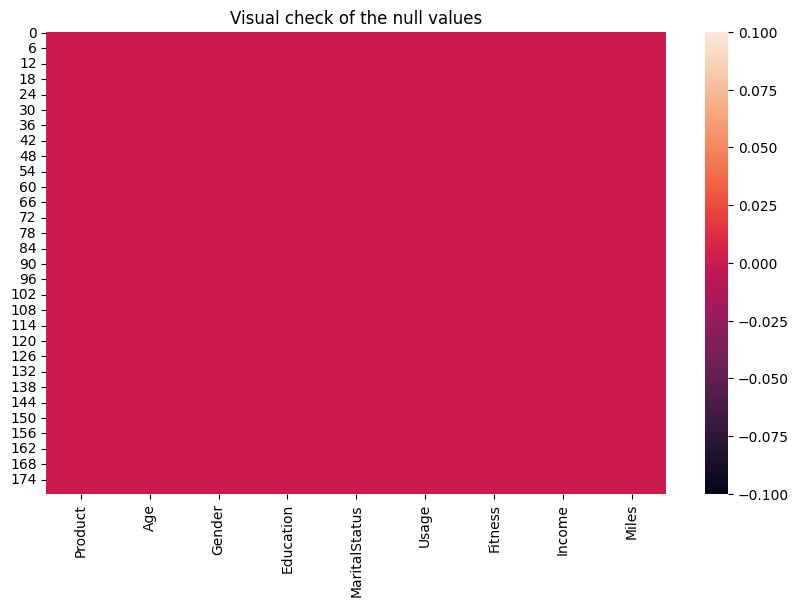

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(af.isnull())
plt.title('Visual check of the null values')
plt.show()

# Checking for unique values

In [17]:
af.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [18]:
for col in af.columns:
    print()
    print('Total Unique Values in',col,'column are :-',af[col].nunique())
    print('Unique Values in',col,'column are :-\n',af[col].unique())
    print()
    print('-'*100)


Total Unique Values in Product column are :- 3
Unique Values in Product column are :-
 ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

----------------------------------------------------------------------------------------------------

Total Unique Values in Age column are :- 32
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

----------------------------------------------------------------------------------------------------

Total Unique Values in Gender column are :- 2
Unique Values in Gender column are :-
 ['Male', 'Female']
Categories (2, object): ['Female', 'Male']

----------------------------------------------------------------------------------------------------

Total Unique Values in Education column are :- 8
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

-------------------------------------------------------------------------------

In [19]:
for col in af.columns:
  if af[col].dtype!='category':
    print(f"Value counts for {col} are:- \n{af[col].value_counts().to_frame().reset_index()}")
    print()
    print("-"*100)

Value counts for Age are:- 
    Age  count
0    25     25
1    23     18
2    24     12
3    26     12
4    28      9
5    33      8
6    35      8
7    22      7
8    30      7
9    27      7
10   38      7
11   21      7
12   31      6
13   34      6
14   29      6
15   20      5
16   40      5
17   19      4
18   32      4
19   37      2
20   45      2
21   48      2
22   47      2
23   18      1
24   41      1
25   39      1
26   36      1
27   43      1
28   46      1
29   44      1
30   50      1
31   42      1

----------------------------------------------------------------------------------------------------
Value counts for Education are:- 
   Education  count
0         16     85
1         14     55
2         18     23
3         15      5
4         13      5
5         12      3
6         21      3
7         20      1

----------------------------------------------------------------------------------------------------
Value counts for Usage are:- 
   Usage  count
0      3     

## Insights

- There are 180 rows and 3 columns.
-No missing values.
-There are 3 unique products ['KP281', 'KP481', 'KP781']



## EDA- Exploratory data analysis

In [20]:
af.sample()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
13,KP281,22,Female,14,Single,3,3,35247,75


In [21]:
af['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [22]:
fp=af['Product'].value_counts(normalize=True)
fp=fp.to_frame().reset_index()

In [23]:
fp

,Product,proportion
0,KP281,0.444444
1,KP481,0.333333
2,KP781,0.222222


In [24]:
fp['proportion']=round(fp.proportion*100,2)
fp

,Product,proportion
0,KP281,44.44
1,KP481,33.33
2,KP781,22.22


In [25]:
cp = ['#A10054','#FC993C','#FFE775','#BD4682','#8C2057']
cp1 = ['#D25380','#E7CBCB','#EE8972','#790252']
cp2 = ['#F7D695','#EE8972','#D15A7C']
cp3 = ['#4F8A8B','#FBD46D','#E7CBCB']
cp4 = ['#A10054','#FC993C','#EE8972','#D15A7C','#FFE775','#BD4682','#8C2057']
product_count=af['Product'].value_counts()

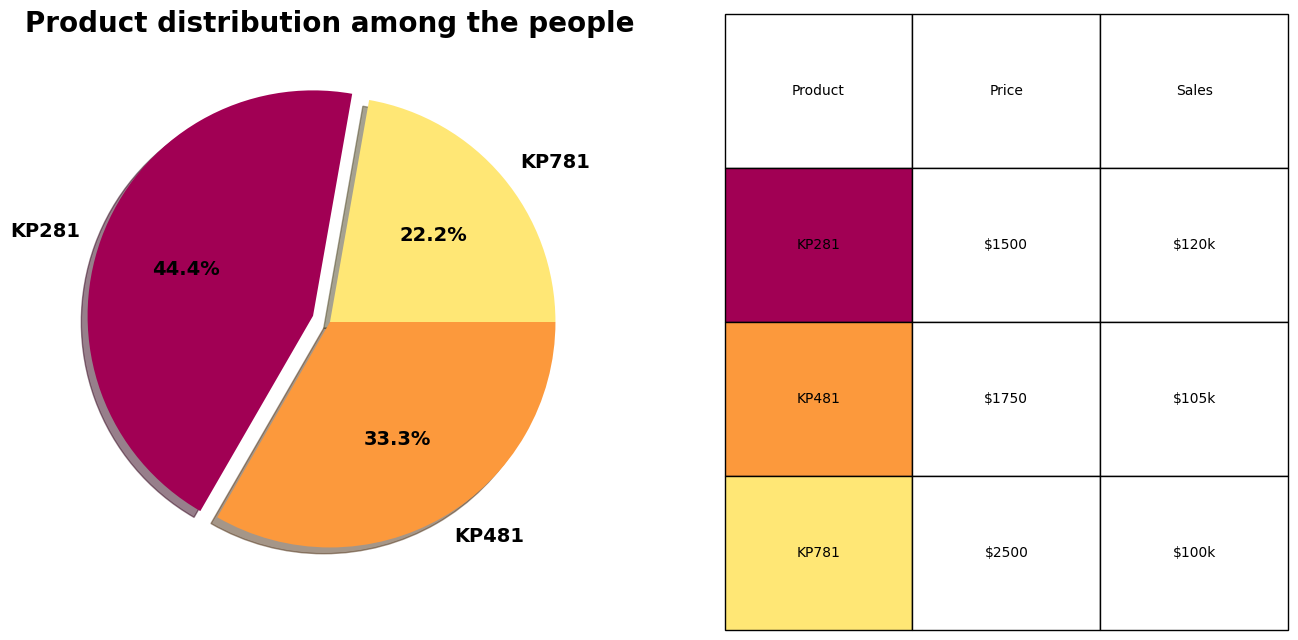

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(product_count,labels=product_count.index,startangle=80,
        autopct="%1.1f%%",colors=['#A10054','#FC993C','#FFE775'],shadow=True,explode=(0.08,0,0),textprops={'fontsize': 14, 'color': 'black','fontweight': 'bold'})

plt.title("Product distribution among the people",fontsize=20,fontweight='bold')


plt.subplot(1,2,2)
product_portfolio = [['KP281','$1500','$120k'],['KP481','$1750','$105k'],['KP781','$2500','$100k']]
color_2d = [[cp[0],'#FFFFFF','#FFFFFF'],[cp[1],'#FFFFFF','#FFFFFF'],[cp[2],'#FFFFFF','#FFFFFF']]

table = plt.table(cellText = product_portfolio, cellColours=color_2d, cellLoc='center',colLabels =['Product','Price','Sales'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
plt.axis('off')

plt.show()

plt.show()



## Insights :-

- Most of the customers bought KP281.

- **33.3%** of the customeres bought KP481.

- **22.2%** of the customers bought KP781

<ipython-input-27-0baa72be9123>:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  a = sns.countplot(data=af,x='Product',hue='Gender',palette=cp,width=0.2)
<ipython-input-27-0baa72be9123>:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  a = sns.countplot(data=af,x='MaritalStatus',hue='Gender',palette=cp,width=0.2)


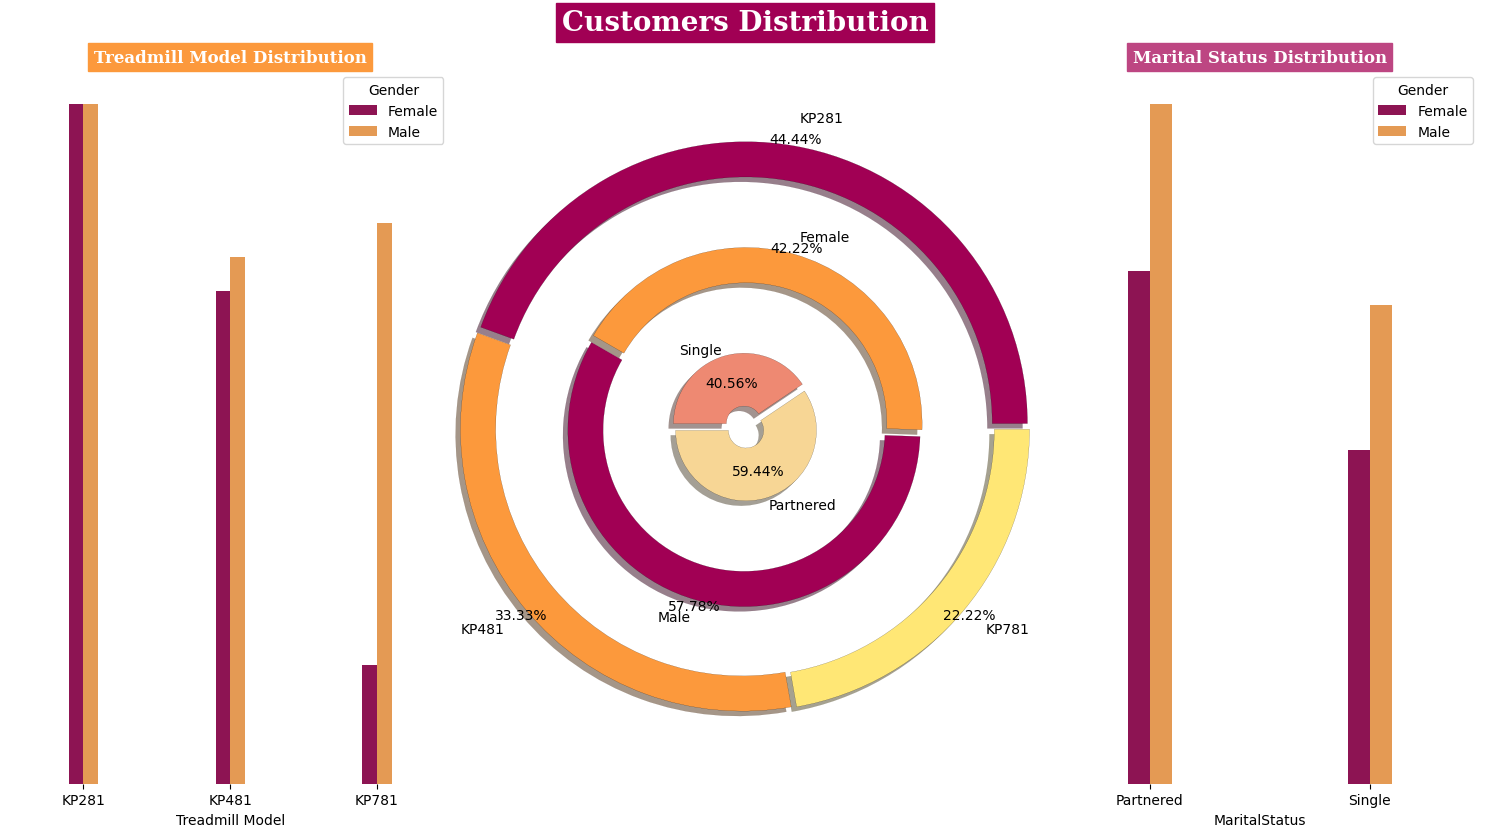

In [27]:
plt.figure(figsize=(15,8.5))
plt.suptitle('Customers Distribution',fontfamily='serif',fontweight='bold',fontsize=20,
             backgroundcolor=cp[0],color='w')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,3,1)
plt.title('Treadmill Model Distribution',fontfamily='serif',fontweight='bold',fontsize=12,
          backgroundcolor=cp[1],color='w')
a = sns.countplot(data=af,x='Product',hue='Gender',palette=cp,width=0.2)
plt.xlabel('Treadmill Model')
plt.ylabel('')
plt.yticks([])

plt.subplot(1,3,3)
a = sns.countplot(data=af,x='MaritalStatus',hue='Gender',palette=cp,width=0.2)
plt.title('Marital Status Distribution',fontfamily='serif',fontweight='bold',fontsize=12,
          backgroundcolor=cp[3],color='w')
plt.yticks([])
plt.ylabel('')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(1,3,2)
plt.pie(af.Product.value_counts(), labels=af.Product.value_counts().index,
       counterclock=True , explode=(0.02,0.02,0.02) , autopct='%.2f%%', pctdistance=1.025,
       colors=cp , textprops={'color':'k','fontsize':10} , shadow=True, radius=1.6,
       wedgeprops=dict(edgecolor='k',linewidth=0.1,width=0.2))

plt.pie(af.Gender.value_counts(), labels=af.Gender.value_counts().index,
       startangle=150 , explode=(0.02,0.02) , autopct='%.2f%%',pctdistance=1.035,
       colors=cp , textprops={'color':'k','fontsize':10} , shadow=True,radius=1,
       wedgeprops=dict(edgecolor='k',linewidth=0.1,antialiased=True,width=0.2))

plt.pie(af.MaritalStatus.value_counts(), labels=af.MaritalStatus.value_counts().index,
       startangle=180 , explode=(0.02,0.02) , autopct='%.2f%%',
       colors=cp2 , textprops={'color':'k','fontsize':10} , shadow=True, radius=0.4,
       wedgeprops=dict(edgecolor='k',linewidth=0.1,antialiased=True,width=0.3))
plt.tight_layout()
plt.show()

#Insights:-

- Partnered customers bought the most od the products.
- **57.7%** of male bought the products.
- And most of male custoners bought the KP281.

In [28]:
af.sample()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
146,KP781,24,Male,16,Single,4,5,61006,100


In [29]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [30]:
af_usage=af.Usage.value_counts(normalize=True).reset_index()
af_usage['proportion']=round(af_usage.proportion*100,2)

af_usage

,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


<ipython-input-31-caedf824f076>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x=u.index,y = u.values,palette=cp4,width=0.3)
<ipython-input-31-caedf824f076>:18: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  a = sns.barplot(x=u.index,y = u.values,palette=cp4,width=0.3)
<ipython-input-31-caedf824f076>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=f.index,y = f.values,palette=cp4,width=0.3)
<ipython-input-31-caedf824f076>:43: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  b = sns.barplot(x=f.index,y = f.values,palette=cp4,width=0.3)


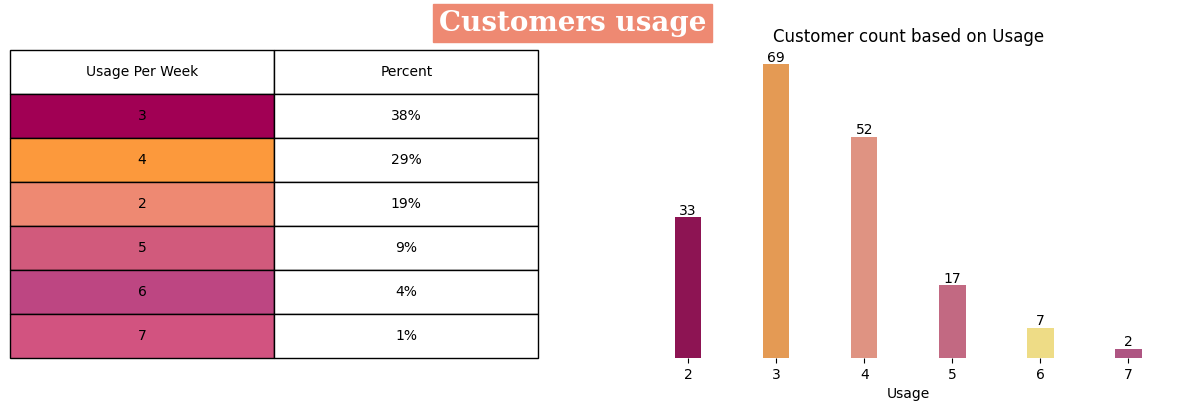

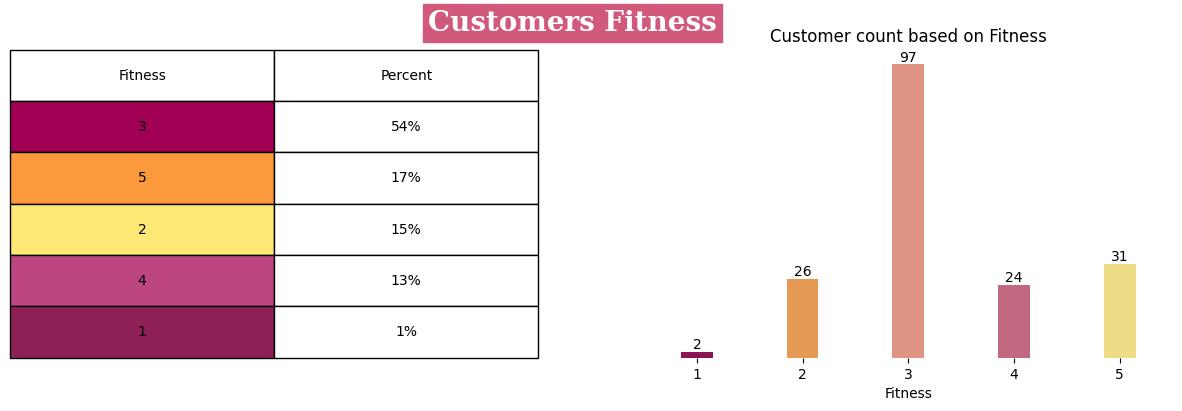

In [31]:
plt.figure(figsize=(15,4))
plt.suptitle('Customers usage',fontfamily='serif',fontweight='bold',fontsize=20,
             backgroundcolor=cp2[1],color='w')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1)
usage_info = [['3','38%'],['4','29%'],['2','19%'],['5','9%'],['6','4%'],['7','1%']]
color_2d = [[cp4[0],'#FFFFFF'],[cp4[1],'#FFFFFF'],[cp4[2],'#FFFFFF'],[cp4[3],'#FFFFFF'],[cp4[5],'#FFFFFF'],
           [cp1[0],'#FFFFFF']]

plt.table(cellText = usage_info, cellColours=color_2d, cellLoc='center',colLabels =['Usage Per Week','Percent'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
plt.axis('off')

plt.subplot(1,2,2)
u = af['Usage'].value_counts()
a = sns.barplot(x=u.index,y = u.values,palette=cp4,width=0.3)
for i in a.containers:
  a.bar_label(i,label_type='edge')
plt.title('Customer count based on Usage')
sns.despine(left=True,bottom=True)
#plt.xticks([])
plt.yticks([])
plt.ylabel('')

plt.figure(figsize=(15,4))
plt.suptitle('Customers Fitness',fontfamily='serif',fontweight='bold',fontsize=20,
             backgroundcolor=cp2[2],color='w')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,1)
fitness_info = [['3','54%'],['5','17%'],['2','15%'],['4','13%'],['1','1%']]
color_2d = [[cp[0],'#FFFFFF'],[cp[1],'#FFFFFF'],[cp[2],'#FFFFFF'],[cp[3],'#FFFFFF'],[cp[4],'#FFFFFF']]

plt.table(cellText = fitness_info, cellColours=color_2d, cellLoc='center',colLabels =['Fitness','Percent'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
plt.axis('off')

plt.subplot(1,2,2)
f = af['Fitness'].value_counts()
b = sns.barplot(x=f.index,y = f.values,palette=cp4,width=0.3)
for i in b.containers:
  b.bar_label(i,label_type='edge')
plt.title('Customer count based on Fitness')
sns.despine(left=True,bottom=True)
plt.yticks([])
#plt.xticks([])
plt.ylabel('')
plt.show()

#Insights:-

- **38%** customers use the product 3 times a week.
-**58%** of customers have fitness level of 3

In [32]:
#Gender stats

fg=af['Gender'].value_counts(normalize=True)
fg=fg.map(lambda z: round(z*100,2))
fg
#

,proportion
Gender,
Male,57.78
Female,42.22


#Insights:-

- 57% of male
- 42% of female


In [33]:
#Martial stats

ms=af['MaritalStatus'].value_counts(normalize=True)
ms=ms.map(lambda z: round(z*100,2))
ms
#

,proportion
MaritalStatus,
Partnered,59.44
Single,40.56


#Insights:

59.44% of customers are Married/Partnered

40.56% of customers are Single

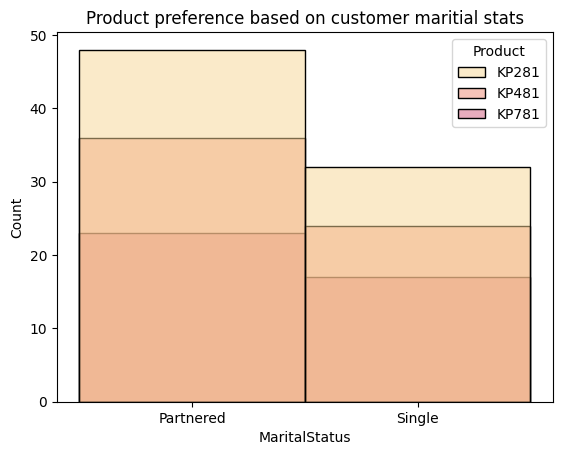

In [34]:
sns.histplot(data=af, x="MaritalStatus", hue="Product" , palette=cp2)
plt.title('Product preference based on customer maritial stats')
plt.show()

In [35]:
af.sample()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
39,KP281,26,Male,16,Partnered,4,4,44343,132


In [36]:
ffc = af['Fitness'].value_counts(normalize=True)
fc=ffc.map(lambda z: round(z*100,2)).reset_index().sort_values(by='Fitness')
od=['Poor shape','Bad shape','Average shape','Good shape','Excellent shape']
fc['Fitness']=od
fc=fc.reset_index(drop=True)
fc

,Fitness,proportion
0,Poor shape,1.11
1,Bad shape,14.44
2,Average shape,53.89
3,Good shape,13.33
4,Excellent shape,17.22


#Insights:

- Approx 54% of customers have rated themselves as they are in Average Shape
- Little close to 14% of customers have rated their fitness less than average
- Over 17% of customers have Peak fitness ratings


<ipython-input-37-4a68ea9832e6>:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=af, x='Age',hue="Product",palette=cp)


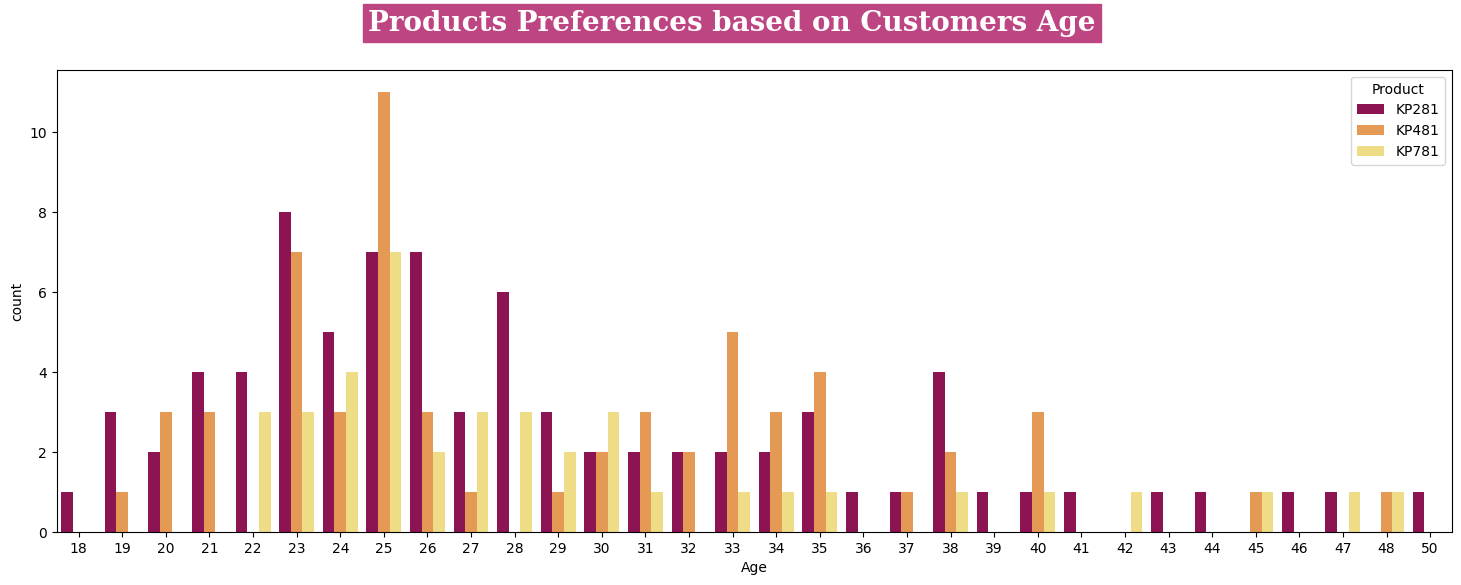

In [37]:
plt.figure(figsize = (18,6))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.countplot(data=af, x='Age',hue="Product",palette=cp)
plt.suptitle('Products Preferences based on Customers Age',fontfamily='serif',fontweight='bold',fontsize=20,
             backgroundcolor=cp4[5],color='w')

plt.show()

In [38]:
af['age_category'] = af.Age
af['age_category'] = pd.cut(af.age_category,bins=[0,20,35,45,60],labels=['Teenage','Adults','Middle Aged','Elderly'])
af.sample(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category
72,KP281,39,Male,16,Partnered,4,4,59124,132,Middle Aged
137,KP481,40,Male,16,Partnered,3,3,64809,95,Middle Aged


In [39]:

af['Fitness_comment'] = af.Fitness
af['Fitness_comment'] = af.Fitness_comment.replace({
                            1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"})
af.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,Fitness_comment
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged,Excellent Shape
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged,Good Shape
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged,Excellent Shape
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elderly,Excellent Shape
179,KP781,48,Male,18,Partnered,4,5,95508,180,Elderly,Excellent Shape


In [40]:
af['income_grp'] = pd.cut(af.Income , bins=[25000,50000,75000,150000] , labels=['middle_class','upper_middle_class','high_class'])

In [41]:
af.sample(4)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,Fitness_comment,income_grp
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teenage,Bad Shape,middle_class
74,KP281,41,Male,16,Partnered,4,3,54576,103,Middle Aged,Average Shape,upper_middle_class
118,KP481,32,Male,16,Single,4,3,60261,127,Adults,Average Shape,upper_middle_class
18,KP281,23,Female,16,Single,4,3,38658,113,Adults,Average Shape,middle_class


In [42]:
af.sample(4)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,Fitness_comment,income_grp
143,KP781,23,Male,16,Single,4,5,58516,140,Adults,Excellent Shape,upper_middle_class
30,KP281,25,Female,14,Partnered,3,3,39795,85,Adults,Average Shape,middle_class
70,KP281,38,Male,14,Single,2,3,52302,56,Middle Aged,Average Shape,upper_middle_class
150,KP781,25,Male,16,Partnered,4,5,49801,120,Adults,Excellent Shape,middle_class


In [43]:
af.to_csv('aerofit_final.csv',sep=',',index=False)

<ipython-input-44-a65446be3f4b>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(af,x='age_category',hue='Product',palette=cp,width=0.3)
<ipython-input-44-a65446be3f4b>:26: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(af,x='income_grp',hue='Product',palette=cp,width=0.3)


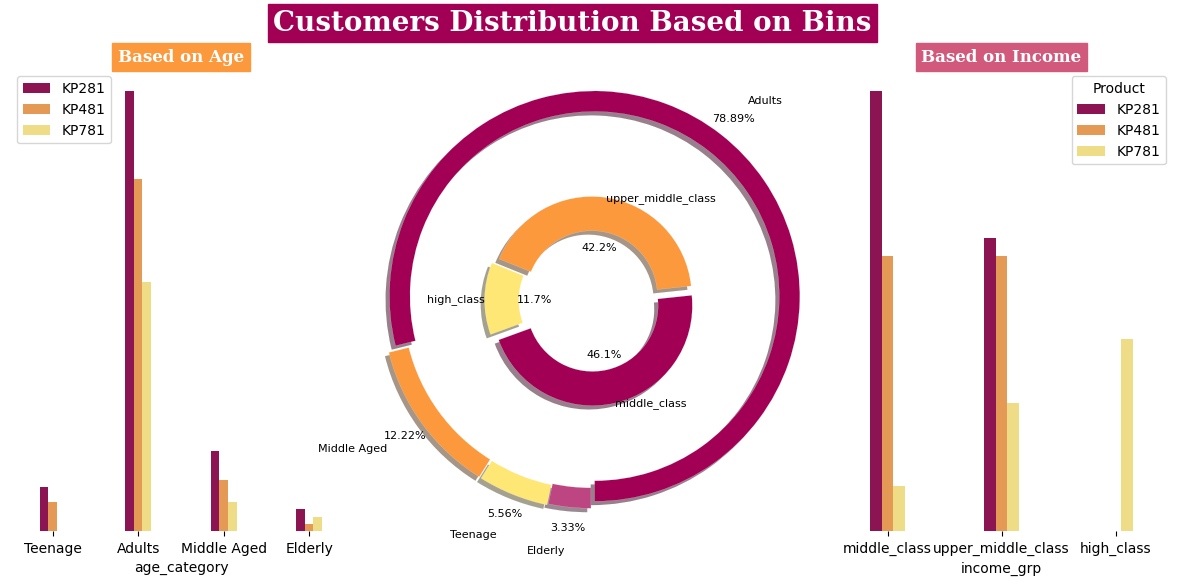

In [44]:
plt.figure(figsize=(15,6))
plt.suptitle('Customers Distribution Based on Bins',fontfamily='serif',fontweight='bold',fontsize=20,
            backgroundcolor=cp4[0],color='w')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,3,1)
sns.countplot(af,x='age_category',hue='Product',palette=cp,width=0.3)
plt.title('Based on Age',fontfamily='serif',fontweight='bold',fontsize=12,backgroundcolor=cp4[1],color='w')
plt.yticks([])
plt.legend(loc='upper left')
plt.ylabel('')

plt.subplot(1,3,2)
plt.pie(af.age_category.value_counts(), labels=af.age_category.value_counts().index,
       explode=(0.04,0.03,0.03,0.02) , autopct='%.2f%%', pctdistance=1.1,startangle=270,
       colors=cp , textprops={'color':'k','fontsize':8} , shadow=True, labeldistance=1.21,
       wedgeprops=dict(edgecolor='w',linewidth=0.1,width=0.15), radius=1.5)

plt.pie(af.income_grp.value_counts(), labels=af.income_grp.value_counts().index, counterclock=True,
       startangle=200 , explode=(0.04,0.03,0.05) , autopct='%.1f%%', pctdistance=0.5,
       colors=cp , textprops={'color':'k','fontsize':8} , shadow=True, labeldistance=1,
       wedgeprops=dict(edgecolor='w',linewidth=0.1,width=0.25), radius=0.73)

plt.subplot(1,3,3)
sns.countplot(af,x='income_grp',hue='Product',palette=cp,width=0.3)
plt.title('Based on Income',fontfamily='serif',fontweight='bold',fontsize=12,backgroundcolor=cp4[3],color='w')
sns.despine(left=True,bottom=True,trim=True)
plt.yticks([])
plt.ylabel('')

plt.show()

In [45]:
af.sample()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,Fitness_comment,income_grp
116,KP481,31,Female,16,Partnered,2,3,51165,64,Adults,Average Shape,upper_middle_class


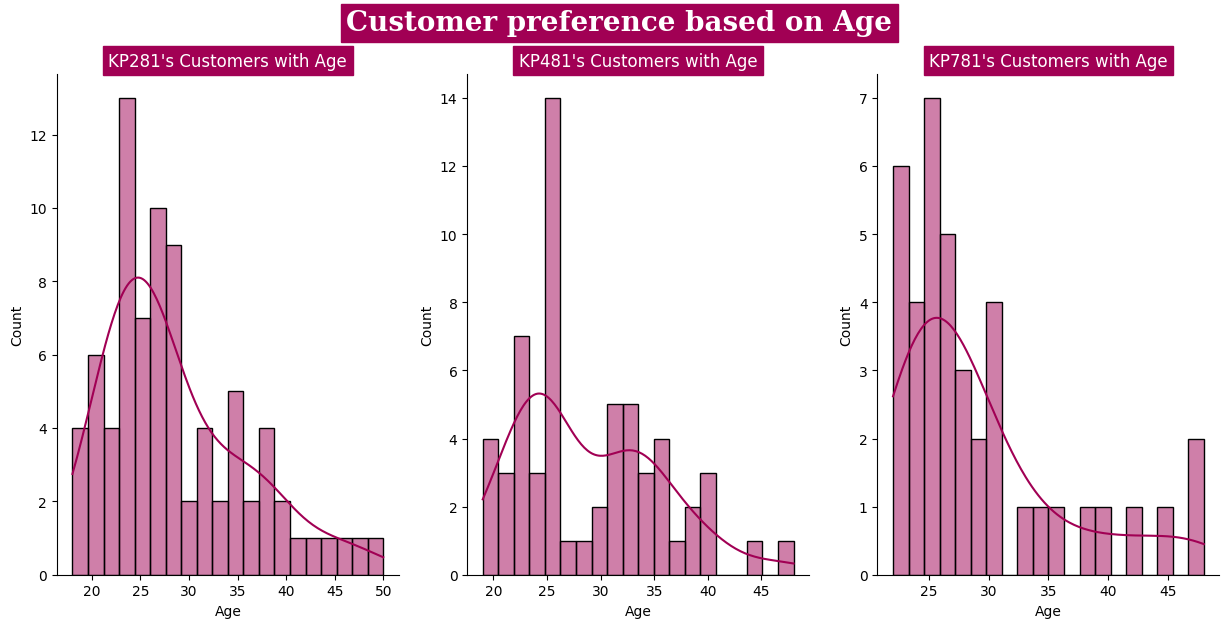

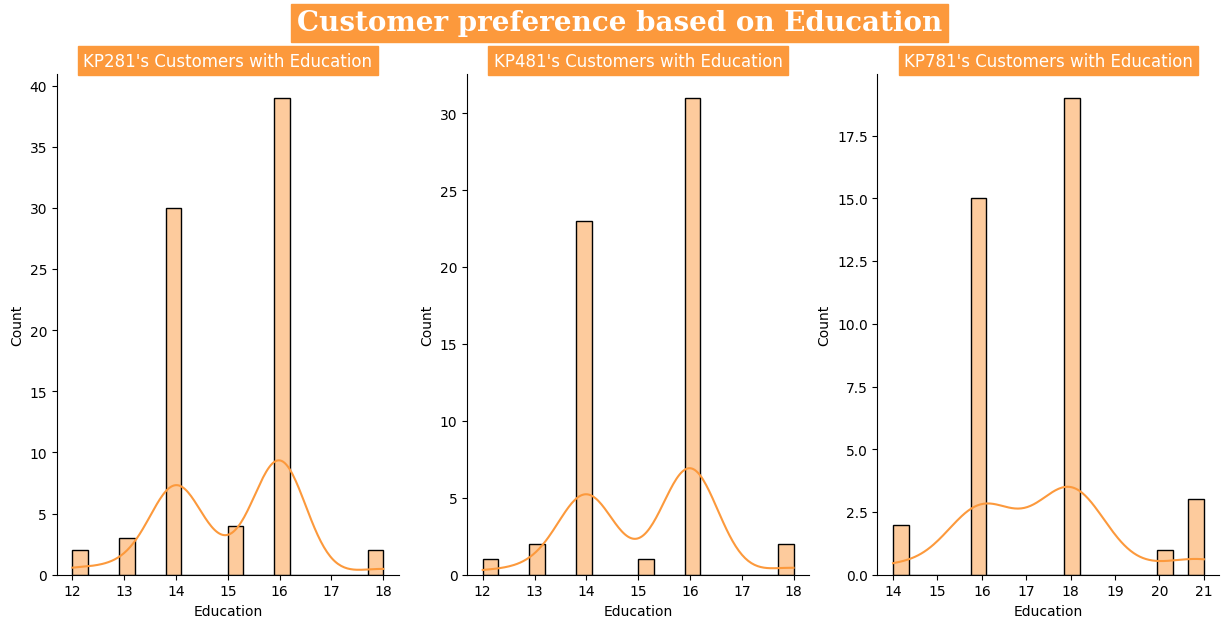

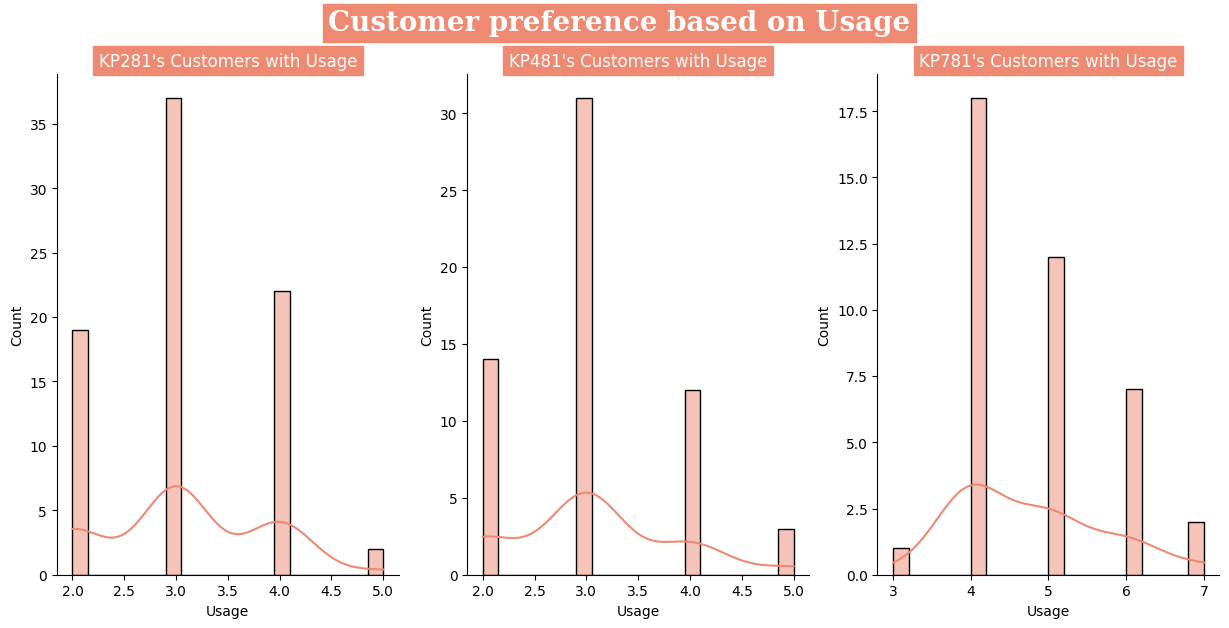

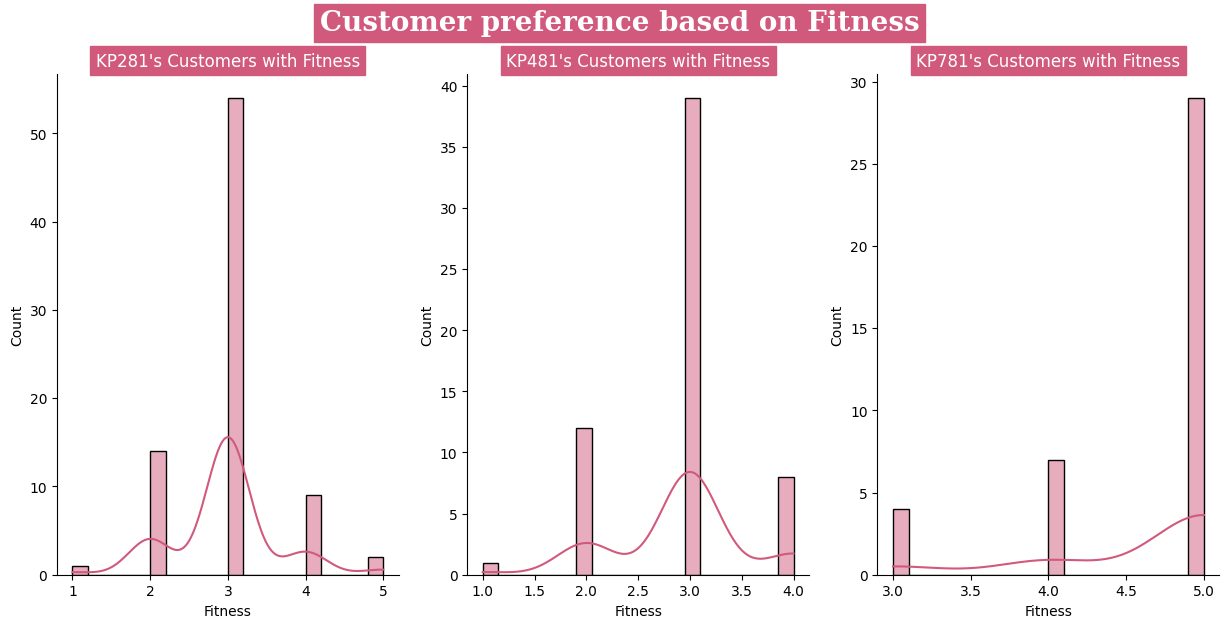

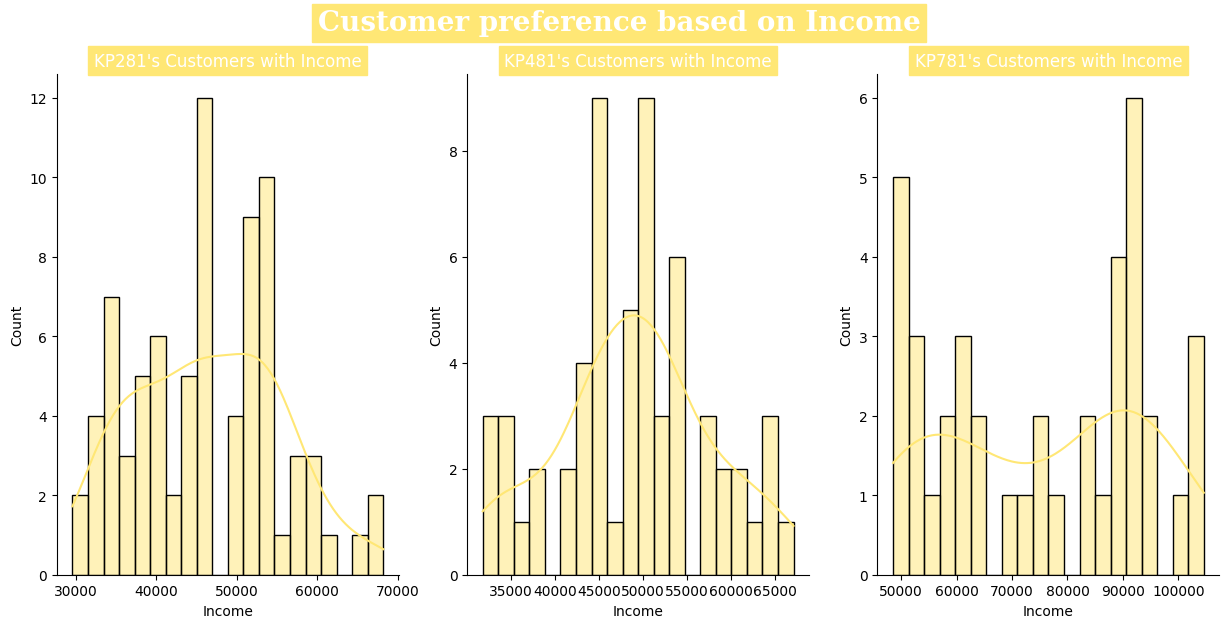

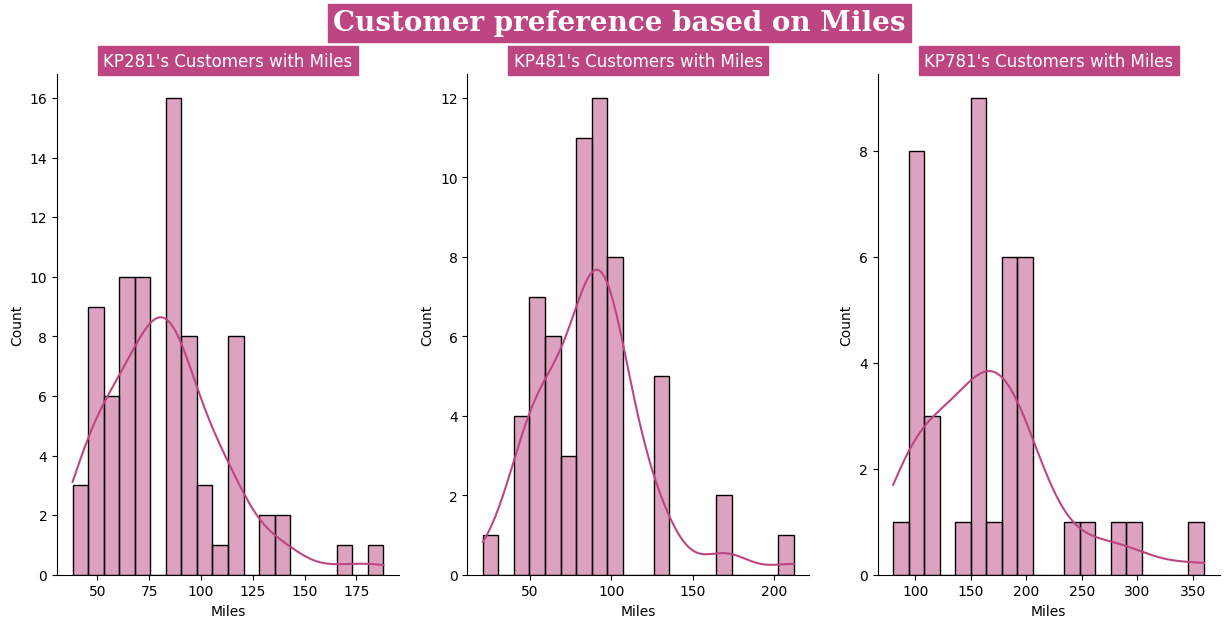

In [46]:
p=af['Product'].unique()
cols=['Age','Education','Usage','Fitness','Income','Miles']

for i in range(len(cols)):
  fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6.5))
  plt.suptitle(f"Customer preference based on {cols[i]}",fontsize=20,fontweight='bold',fontfamily='serif',backgroundcolor=cp4[i],color='w')

  for j in range(len(p)):
    prd=af[af.Product==p[j]]
    sns.histplot(prd,x=cols[i],bins=20,kde=True, ax=ax[j], color=cp4[i])
    sns.despine()
    ax[j].set_title(f"{p[j]}'s Customers with {cols[i]}",backgroundcolor=cp4[i],color='w')




In [47]:
af.sample()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,Fitness_comment,income_grp
179,KP781,48,Male,18,Partnered,4,5,95508,180,Elderly,Excellent Shape,high_class


## Probability:-



Based on the above analysis:

- Probalility of selecting KP281 is 44%
- Probalility of selecting KP481 is 33%
- Probalility of selecting KP&81 is 22%

In [48]:
kp281_d=af[af['Product']=='KP281']
kp481_d=af[af['Product']=='KP481']
kp781_d=af[af['Product']=='KP781']

In [49]:
af.shape

(180, 12)

Conditional Probability :-

- Male and Single

In [50]:
pms = af[(af['Gender']=='Male') & (af['MaritalStatus']=='Single')]
v1=round(len(pms[pms['Product']=='KP281'])/(len(pms))*100,2)
v2=round(len(pms[pms['Product']=='KP481'])/(len(pms))*100,2)
v3=round(len(pms[pms['Product']=='KP781'])/(len(pms))*100,2)
print('Probability of Male and Single for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Male and Single for buying
- KP281 is 44.19%
- KP481 is 23.26%
- KP781 is 32.56%


- Male and Partnered :

In [51]:
pmp = af[(af['Gender']=='Male') & (af['MaritalStatus']=='Partnered')]
v1=round(len(pmp[pmp['Product']=='KP281'])/(len(pmp))*100,2)
v2=round(len(pmp[pmp['Product']=='KP481'])/(len(pmp))*100,2)
v3=round(len(pmp[pmp['Product']=='KP781'])/(len(pmp))*100,2)
print('Probability of Male and Partnered for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Male and Partnered for buying
- KP281 is 34.43%
- KP481 is 34.43%
- KP781 is 31.15%


- Female and Single :

In [52]:
pfs = af[(af['Gender']=='Female') & (af['MaritalStatus']=='Single')]
v1=round(len(pfs[pfs['Product']=='KP281'])/(len(pfs))*100,2)
v2=round(len(pfs[pfs['Product']=='KP481'])/(len(pfs))*100,2)
v3=round(len(pfs[pfs['Product']=='KP781'])/(len(pfs))*100,2)
print('Probability of Female and Single for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Female and Single for buying
- KP281 is 43.33%
- KP481 is 46.67%
- KP781 is 10.0%


- Female and Partnered :

In [53]:
pfp = af[(af['Gender']=='Female') & (af['MaritalStatus']=='Partnered')]
v1=round(len(pfp[pfp['Product']=='KP281'])/(len(pfp))*100,2)
v2=round(len(pfp[pfp['Product']=='KP481'])/(len(pfp))*100,2)
v3=round(len(pfp[pfp['Product']=='KP781'])/(len(pfp))*100,2)
print('Probability of Female and Partnered for buying')
print(f'- KP281 is {v1}%\n- KP481 is {v2}%\n- KP781 is {v3}%')

Probability of Female and Partnered for buying
- KP281 is 58.7%
- KP481 is 32.61%
- KP781 is 8.7%


Probability of Buying KP281 increased from 44.44% to 58.7%, if the customer is Female and Partnered.

Probability of Buying KP481 increased from 33.33% to 46.67%, if the customer is Female and Single.

Probability of Buying KP781 increased from 22.22% to 32.56%, if the customer is Male and Single.

Probability of Buying KP481 & KP781 increased from 33.33% & 22.22% to 34.43%, if the customer is Male and Single.

Probability of Buying KP781 decreased from 22.22% to 8.7%, if the customer is Female and Partnered.


## Probability of Product purchase with respect to gender

In [57]:
gct=round(pd.crosstab(af.Product,af.Gender,normalize=True,margins=True)*100,2)
gct

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


## Insights

The Probability of a treadmill being purchased by a female is 42%.

The conditional probability of purchasing the treadmill model given that the customer is Female is

For Treadmill model KP281 - 22%

For Treadmill model KP481 - 16%

For Treadmill model KP781 - 4%

The Probability of a treadmill being purchased by a male is 58%.

The conditional probability of purchasing the treadmill model given that the customer is Male is -

For Treadmill model KP281 - 22%

For Treadmill model KP481 - 17%

For Treadmill model KP781 - 18%

In [58]:
gcct = round(pd.crosstab(index=af.Product,columns=af.Gender,normalize='columns')*100,2)
gcct

Gender,Female,Male
Product,,
KP281,52.63,38.46
KP481,38.16,29.81
KP781,9.21,31.73


## Insights:-

he Probability of Customer purchasing the Product Genderwise (only males or only females)

P(KP281 | Female) = 52.63 %

P(KP481 | Female) = 38.16 %

P(KP781 | Female) = 9.21 %

P(KP281 | male) = 38.46 %

P(KP481 | male) = 29.81 %

P(KP781 | male) = 31.73 %

Probability of Female customer buying KP281(52.63%) which is more than male(38.46%).

we can say that KP281 is more preferred by Female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%).

In [59]:
(pd.crosstab(index =af['Product'],columns = af['MaritalStatus'],margins = True,normalize = True)*100).round(2)
# round(pd.crosstab(af.Product,af.MaritalStatus,margins=True,normalize=True)*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


## Insights:-

The Probability of a treadmill being purchased by a Married/partnered Customer is 59%.

The conditional probability of purchasing the treadmill model given that the customer is Married/partnered is

For Treadmill model KP281 - 27%

For Treadmill model KP481 - 20%

For Treadmill model KP781 - 13%

The Probability of a treadmill being purchased by a Single Customer is 41%.

The conditional probability of purchasing the treadmill model given that the customer is Single is -

For Treadmill model KP281 - 18%

For Treadmill model KP481 - 13%

For Treadmill model KP781 - 9%



In [60]:
(pd.crosstab(index =af['Product'],columns = af['MaritalStatus'],normalize = 'columns')*100).round(2)

MaritalStatus,Partnered,Single
Product,,
KP281,44.86,43.84
KP481,33.64,32.88
KP781,21.50,23.29


In [61]:
uct = round(pd.crosstab(af.Product,af.Usage,margins=True,normalize=True)*100,2)
uct

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,10.56,20.56,12.22,1.11,0.00,0.00,44.44
KP481,7.78,17.22,6.67,1.67,0.00,0.00,33.33
KP781,0.00,0.56,10.00,6.67,3.89,1.11,22.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


Insights :-   

The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -

For Treadmill model KP281 - 21%

For Treadmill model KP481 - 17%

For Treadmill model KP781 - 1%

The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -

For Treadmill model KP281 - 12%

For Treadmill model KP481 - 7%

For Treadmill model KP781 - 10%

The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -

For Treadmill model KP281 - 11%

For Treadmill model KP481 - 8%

For Treadmill model KP781 - 0%

In [62]:
fcct = np.round(pd.crosstab(af.Product,af.Fitness_comment,margins=True,normalize=True)*100,2)
fcct.T

Product,KP281,KP481,KP781,All
Fitness_comment,,,,
Average Shape,30.00,21.67,2.22,53.89
Bad Shape,7.78,6.67,0.00,14.44
Excellent Shape,1.11,0.00,16.11,17.22
Good Shape,5.00,4.44,3.89,13.33
Poor Shape,0.56,0.56,0.00,1.11
All,44.44,33.33,22.22,100.00


## Insights :-  

The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -

For Treadmill model KP281 - 30%

For Treadmill model KP481 - 22%

For Treadmill model KP781 - 2%

The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 15%.

The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.

In [63]:
np.round(pd.crosstab(index=[af.Product,af.Fitness_comment],columns=af.Gender,normalize='columns')*100,2).T

Product                 KP281                                                  \
Fitness_comment Average Shape Bad Shape Excellent Shape Good Shape Poor Shape   
Gender                                                                          
Female                  34.21     13.16            1.32       3.95       0.00   
Male                    26.92      3.85            0.96       5.77       0.96   

Product                 KP481                                         KP781  \
Fitness_comment Average Shape Bad Shape Good Shape Poor Shape Average Shape   
Gender                                                                        
Female                  23.68      7.89       5.26       1.32          1.32   
Male                    20.19      5.77       3.85       0.00          2.88   

Product                                     
Fitness_comment Excellent Shape Good Shape  
Gender                                      
Female                     6.58       1.32  
Male                      23.08       5.77

Probability of Product purchase with respect to Age:

In [67]:
round(pd.crosstab(af.Product,af.age_category,normalize='columns')*100,2).T

Product,KP281,KP481,KP781
age_category,,,
Teenage,60.00,40.00,0.00
Adults,42.25,33.80,23.94
Middle Aged,50.00,31.82,18.18
Elderly,50.00,16.67,33.33


In [68]:
round(pd.crosstab(af.Product,af.age_category,margins=True,normalize=True)*100,2).T

Product,KP281,KP481,KP781,All
age_category,,,,
Teenage,3.33,2.22,0.00,5.56
Adults,33.33,26.67,18.89,78.89
Middle Aged,6.11,3.89,2.22,12.22
Elderly,1.67,0.56,1.11,3.33
All,44.44,33.33,22.22,100.00


## Insights :-   


The Probability of a treadmill being purchased by a Teens(0-20) is 6%.

The conditional probability of purchasing the treadmill model given that the customer is Teens is

For Treadmill model KP281 - 3%

For Treadmill model KP481 - 2%

For Treadmill model KP781 - 0%

The Probability of a treadmill being purchased by a Adults(20-35) is 79%.

The conditional probability of purchasing the treadmill model given that the customer is Adult is -

For Treadmill model KP281 - 33%

For Treadmill model KP481 - 26%

For Treadmill model KP781 - 19%

The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.
The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.


In [69]:
np.round(pd.crosstab(index=af.Product , columns=af.income_grp , normalize='columns')*100,2).T

Product,KP281,KP481,KP781
income_grp,,,
middle_class,57.83,36.14,6.02
upper_middle_class,42.11,39.47,18.42
high_class,0.00,0.00,100.00


In [70]:
np.round(pd.crosstab(index=af.Product , columns=af.income_grp , margins=True , normalize=True)*100,2).T

Product,KP281,KP481,KP781,All
income_grp,,,,
middle_class,26.67,16.67,2.78,46.11
upper_middle_class,17.78,16.67,7.78,42.22
high_class,0.00,0.00,11.67,11.67
All,44.44,33.33,22.22,100.00



Outlier detection of Age
..............................
Minimum: 18
Maximum: 50
Initial Range (with outlier) : 32
Q1: 24.0
Q2: 26.0
Q3: 33.0
IQR: 9.0
Final Range (without outlier) : 36.0
Lower outliers are: []
Upper outliers are: [47, 50, 48, 47, 48]
Lower Outlier Percentage is 0.0%
Upper Outlier Percentage is 2.78%
Overall Outlier Percentage is 2.78%
Outlier points towards left of boxplot : 0
Outlier points towards right of boxplot : 3 and they are {48, 50, 47}

-------------------------------------------------------------------------------------------------------------------------------

Outlier detection of Education
..............................
Minimum: 12
Maximum: 21
Initial Range (with outlier) : 9
Q1: 14.0
Q2: 16.0
Q3: 16.0
IQR: 2.0
Final Range (without outlier) : 8.0
Lower outliers are: []
Upper outliers are: [20, 21, 21, 21]
Lower Outlier Percentage is 0.0%
Upper Outlier Percentage is 2.22%
Overall Outlier Percentage is 2.22%
Outlier points towards left of boxplot : 0
Outli

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


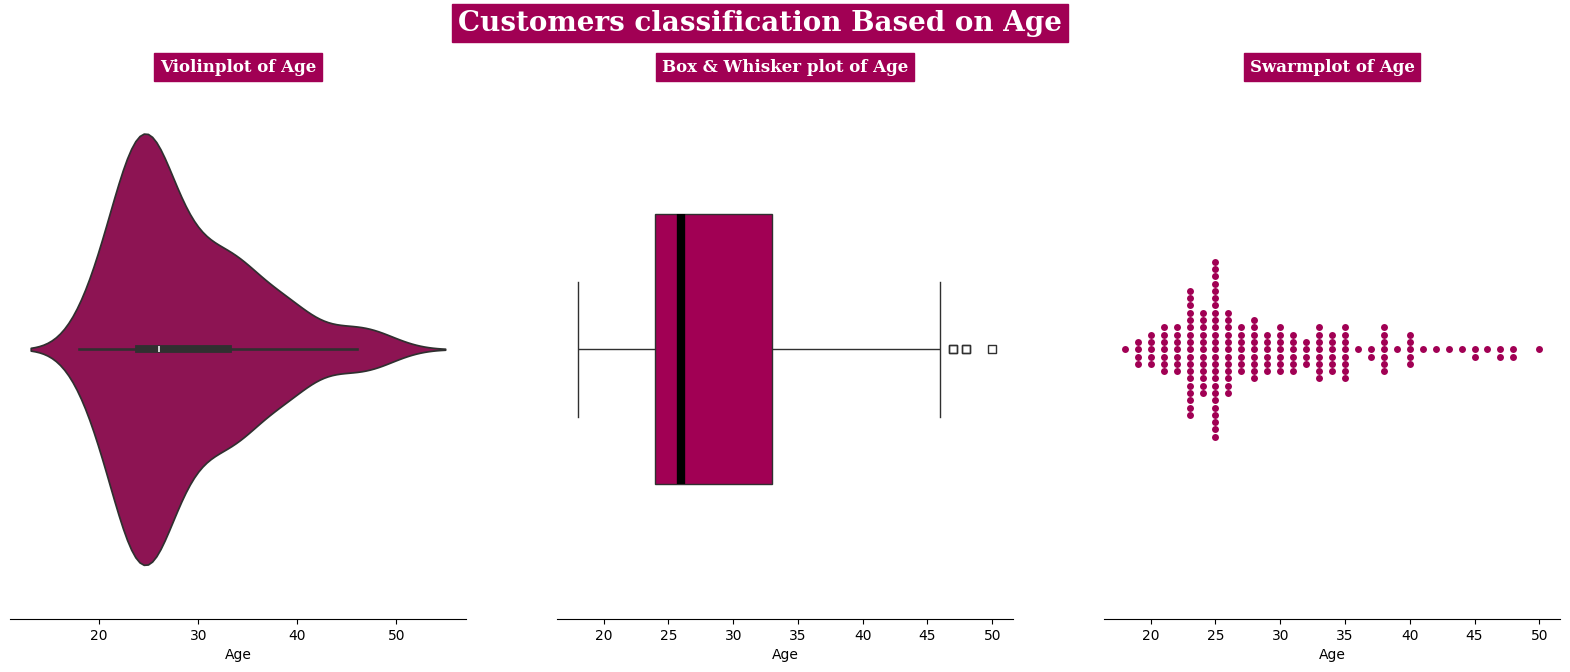

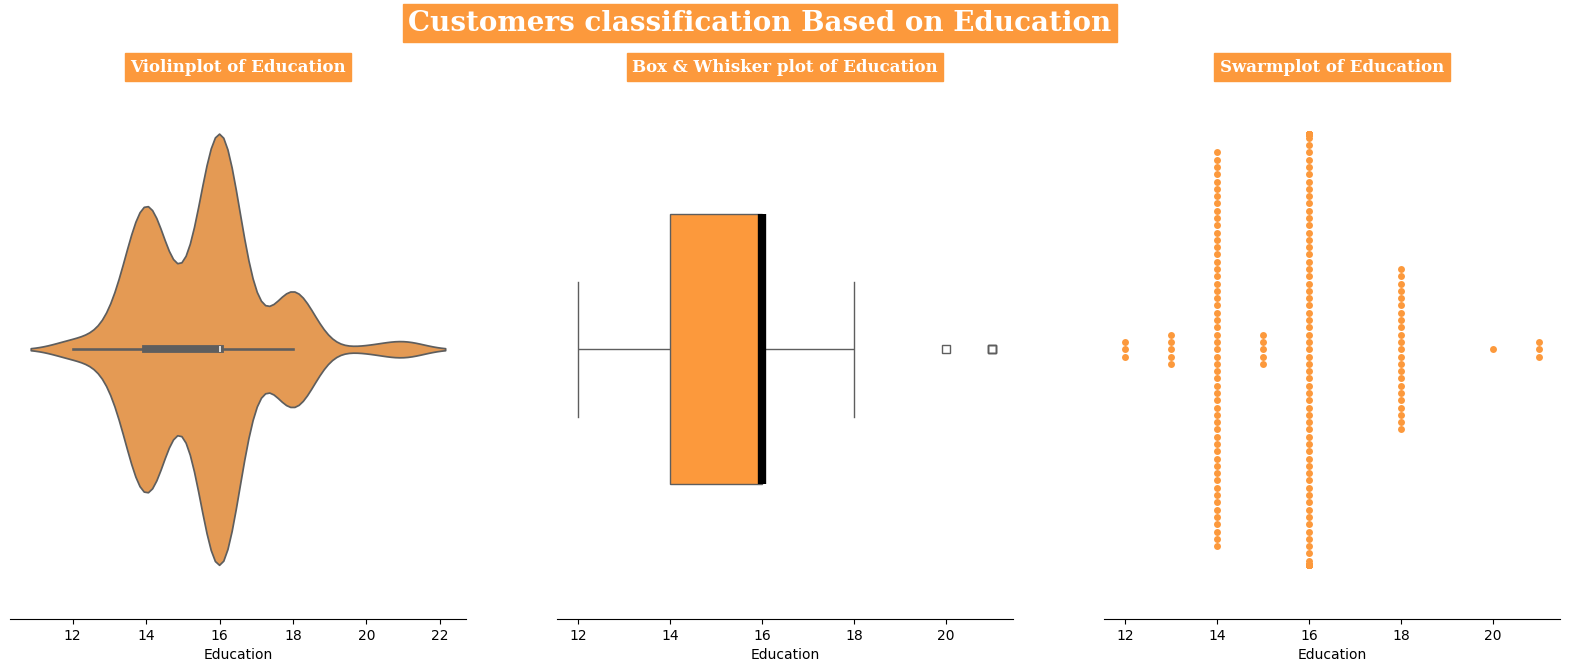

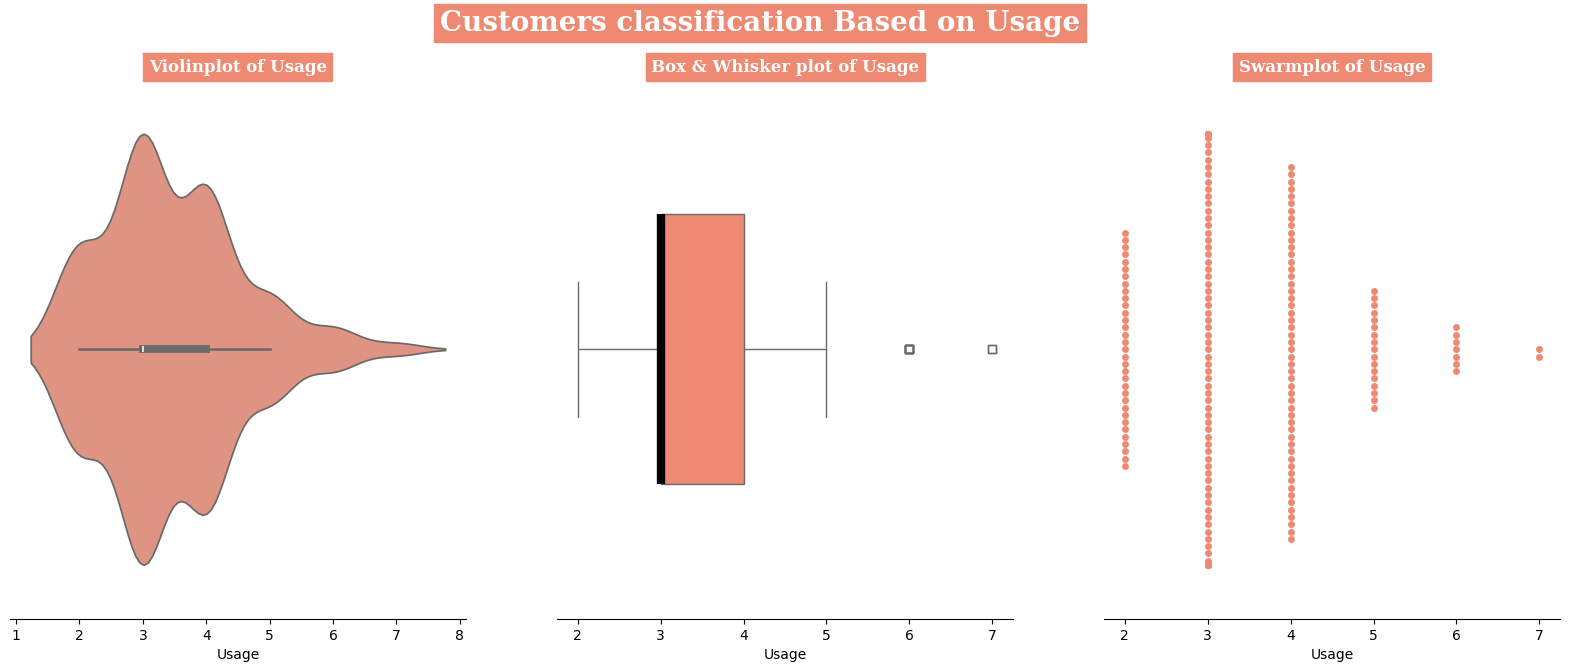

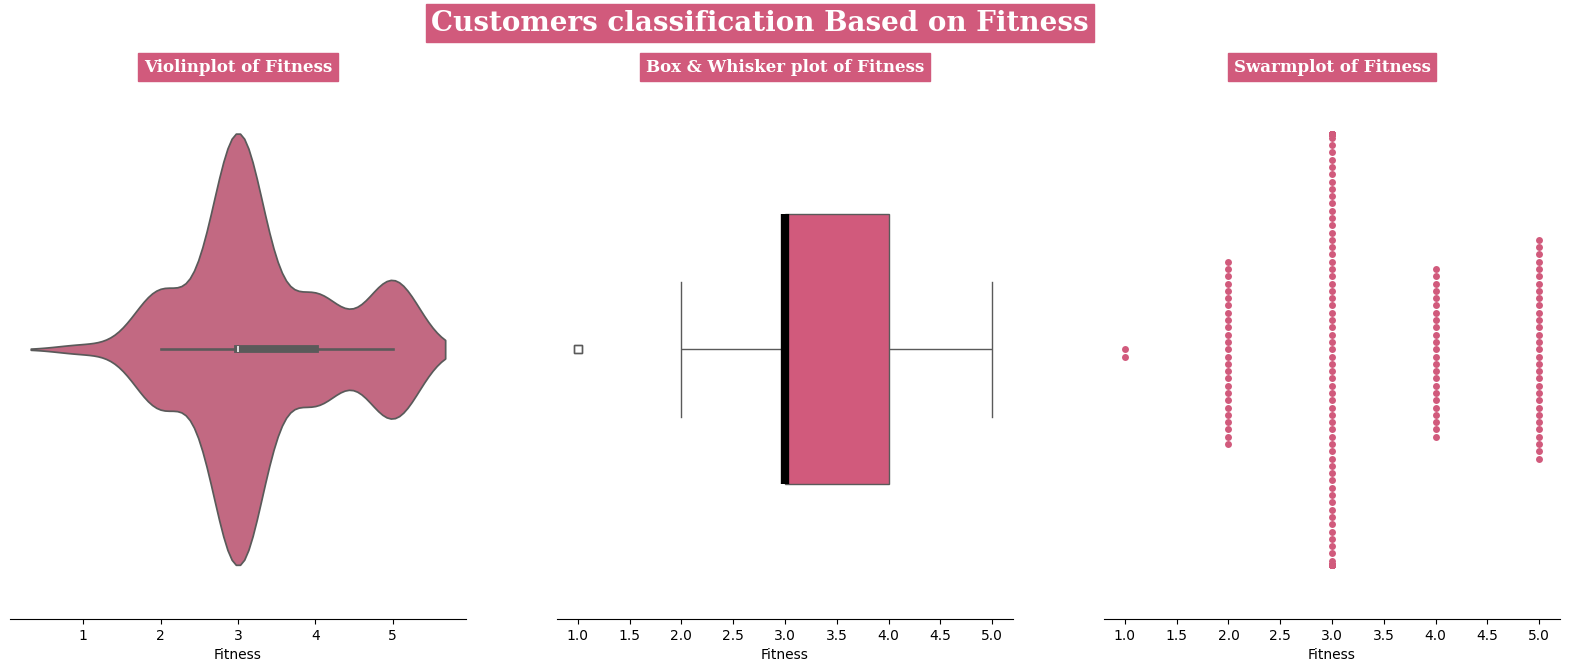

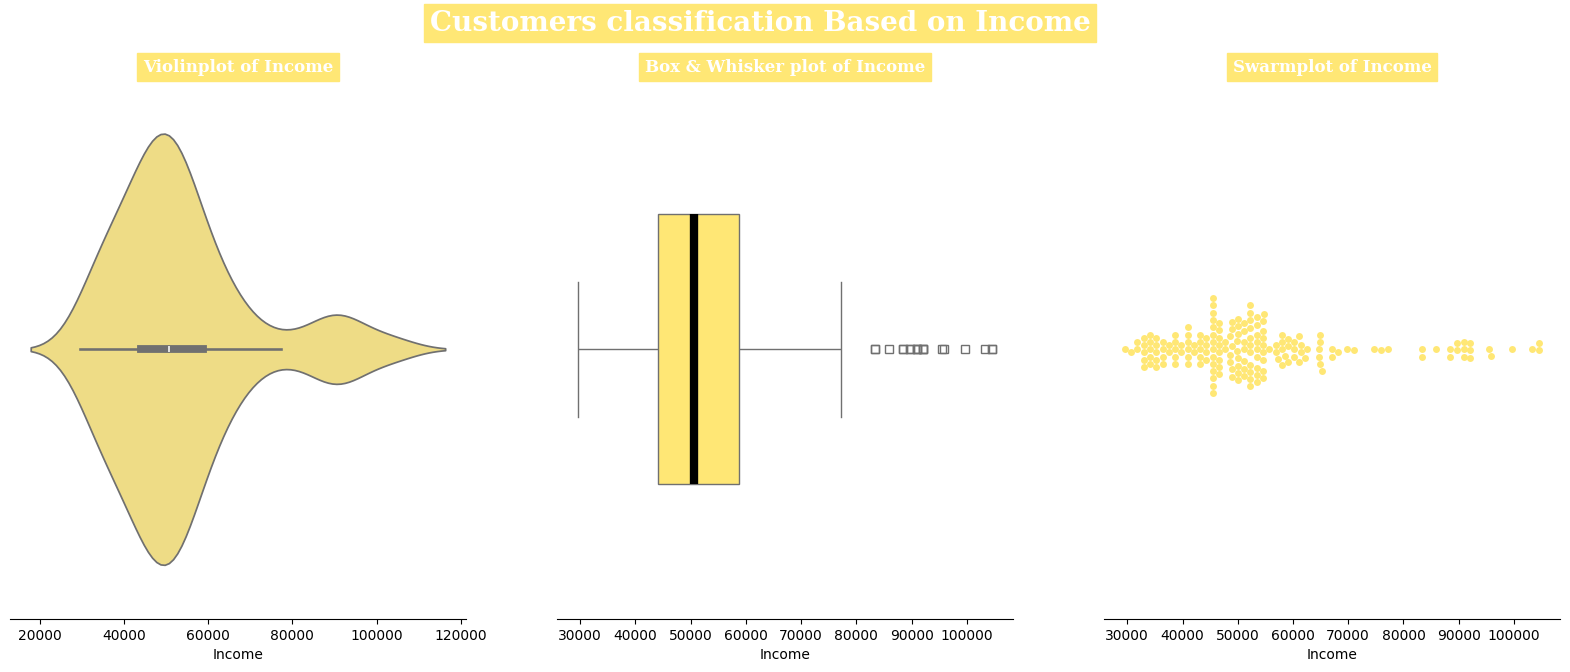

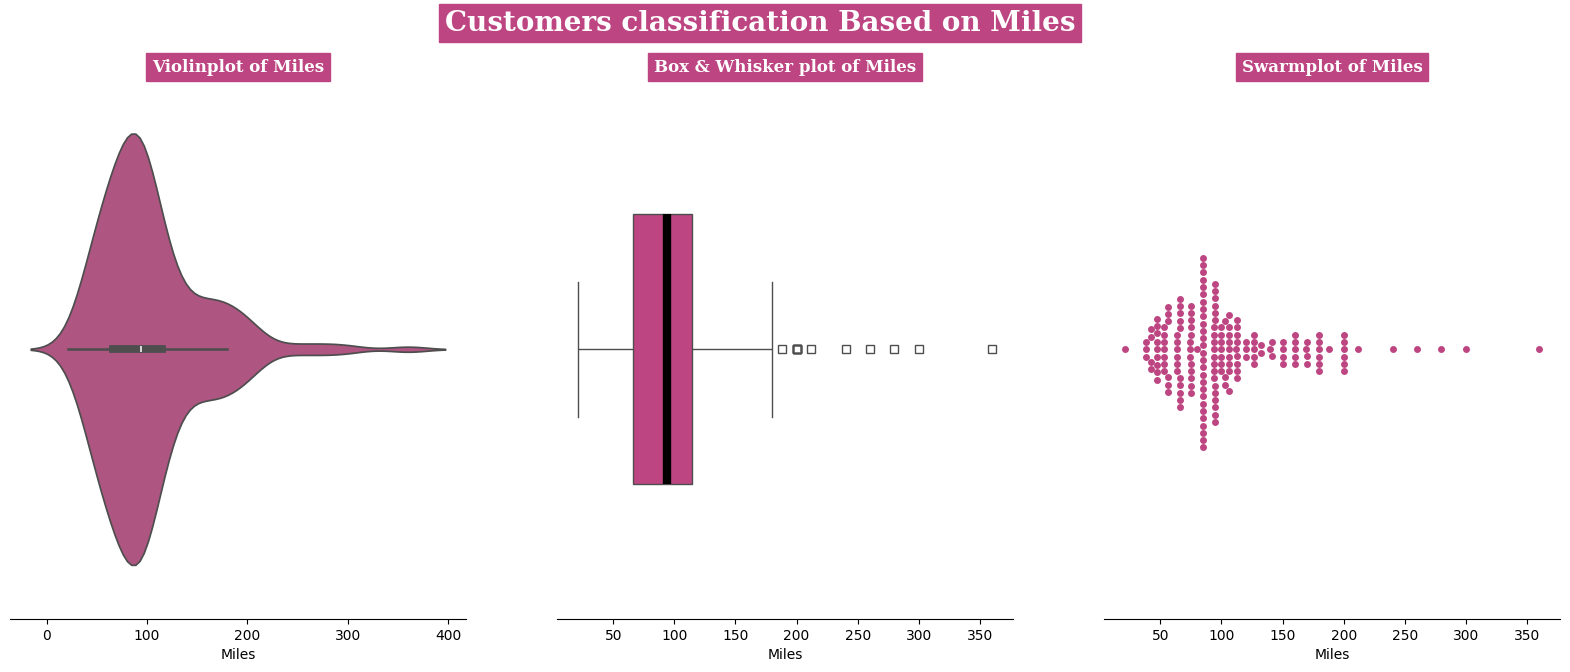

In [71]:
num_cols = ['Age','Education','Usage','Fitness','Income','Miles']

for i in range(len(num_cols)):
    data = af[num_cols[i]].tolist()
    mini = np.min(data)
    Q1 = np.percentile(data, 25)
    Q2 = np.median(data)
    Q3 = np.percentile(data, 75)
    maxi = np.max(data)
    IQR = Q3 - Q1

    lo = Q1 - (1.5 * IQR)
    ho = Q3 + (1.5 * IQR)

    lower_outliers=[]
    upper_outliers=[]
    for k in data:
        if k < lo:
            lower_outliers.append(k)

        elif k > ho:
            upper_outliers.append(k)

    uo_pct = round((len(upper_outliers)*100/af.shape[0]),2)
    lo_pct = round((len(lower_outliers)*100/af.shape[0]),2)

    print()
    print(f"Outlier detection of {num_cols[i]}")
    print('.'*30)
    print("Minimum:", mini)
    print("Maximum:", maxi)
    print(f'Initial Range (with outlier) : {(maxi-mini)}')
    print("Q1:", Q1)
    print("Q2:", Q2)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print(f'Final Range (without outlier) : {(ho-lo)}')
    print("Lower outliers are:", lower_outliers)
    print("Upper outliers are:", upper_outliers)
    print(f'Lower Outlier Percentage is {lo_pct}%')
    print(f'Upper Outlier Percentage is {uo_pct}%')
    print(f'Overall Outlier Percentage is {(lo_pct+uo_pct)}%')

    if len(set(lower_outliers)):
        print(f'Outlier points towards left of boxplot : {len(set(lower_outliers))} and they are {(set(lower_outliers))}')
    else:
        print(f'Outlier points towards left of boxplot : {len(set(lower_outliers))}')
    if len(set(upper_outliers)):
        print(f'Outlier points towards right of boxplot : {len(set(upper_outliers))} and they are {(set(upper_outliers))}')
    else:
        print(f'Outlier points towards right of boxplot : {len(set(upper_outliers))}')
    print()

    plt.figure(figsize=(20,7))
    plt.style.use('default')
    plt.style.use('seaborn-v0_8-bright')
    plt.suptitle(f'Customers classification Based on {num_cols[i]}',fontfamily='serif',fontweight='bold',fontsize=20,
              backgroundcolor=cp4[i],color='w')


    plt.subplot(1,3,1)
    sns.violinplot(af,x=num_cols[i],color=cp4[i])
    plt.title(f'Violinplot of {num_cols[i]}',fontfamily='serif',fontweight='bold',fontsize=12,
              loc='center',backgroundcolor=cp4[i],color='w')
    plt.yticks([])

    plt.subplot(1,3,2)
    bxp = sns.boxplot(af,x=num_cols[i],color=cp4[i],width=0.5,saturation=97,flierprops={"marker":"s"},
                      medianprops={"color": "k", "linewidth": 6})#,boxprops={"facecolor": (.3, .5, .7, .5)})
    plt.title(f'Box & Whisker plot of {num_cols[i]}',fontfamily='serif',fontweight='bold',fontsize=12,
              loc='center',backgroundcolor=cp4[i],color='w')
    sns.despine(left=True)
    plt.yticks([])

    plt.subplot(1,3,3)
    sns.swarmplot(af,x=num_cols[i],color=cp4[i])
    plt.title(f'Swarmplot of {num_cols[i]}',fontfamily='serif',fontweight='bold',fontsize=12,
              loc='center',backgroundcolor=cp4[i],color='w')
    sns.despine(left=True)
    plt.yticks([])
    print('-'*127)

In [72]:
afcorr = af[['Age','Education','Usage','Fitness','Income','Miles']].corr()
afcorr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


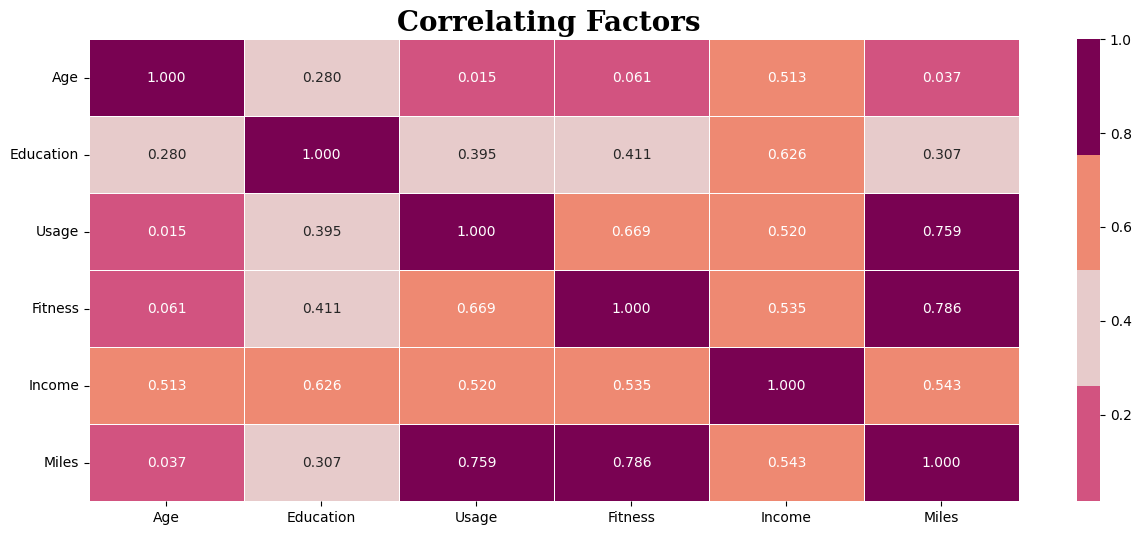

In [73]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(afcorr,annot=True,fmt='.3f',linewidths=.5,cmap=cp1)
plt.title('Correlating Factors ',fontfamily='serif',fontweight='bold',fontsize=20)
plt.yticks(rotation=0)
plt.show()

## Insights :-  

From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them
Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.
Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

<kbd>**Based on all the above analysis**

    -> Probability of purchase of KP281 = 44%
    -> Probability of purchase of KP481 = 33%
    -> Probability of purchase of KP781 = 22%


- `Customer Profile` for **`KP281`** Treadmill:
    
    - Most preferred by entry level
    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer ranges from 35k USD 55k USD
    - Weekly Usage - 3 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 100 miles
    - Mostly Single Female and Partnered Male prefer this product
-----    
    
- `Customer Profile` for **`KP481`** Treadmill:
    
    - This is an Intermediate level Product.
    - Age of customer mainly between 18 to 35 years  with few between 35 to 50 years
    - Education level of customer 13 years and above
    - Annual Income of customer between 40k-80k USD
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 200 miles
    - Probability of Female customer buying KP481 is significantly higher than male.   
    
    
----

- `Customer Profile` for **`KP781`** Treadmill:

    - Due to the High Price & being the advanced type, customer prefers less of this product.
    - Age of customer between 18 to 35 years
    - Education level of customer 15 years and above
    - Annual Income of customer 80k USD and above
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage is >100 miles and above
    - Partnered Female bought KP781 treadmill compared to Partnered Male.
    - This product is preferred by the customer where the correlation between Education and Income is High. </kbd>